In [1]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [2]:
password_response, time_response, survey_response = get_responses(2)

## Password Analysis

In [3]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2,password2_recall3
0,1trdiayw$&,1trdiayw&$,1trdiayw&$,NaN
1,Password123!,NaN,NaN,NaN
2,IWTCDTE!,NaN,NaN,NaN
3,MD!wtsf,NaN,NaN,NaN
4,daniel123,NaN,NaN,NaN
5,victor12,NaN,NaN,NaN
6,Igmp4mn@,NaN,NaN,NaN
7,tiabobs662!,tiabobs6662!,tiabobs666!,tiabobs662!!
8,qw43%^,qw34%^,qw34%^,qw34^%
9,@1mfgfwam,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,10.255,32.479,18.423,107.595,84.749,322.202,17.036,101.708,27.493,65.827,68.461,60.278,15.275100
1,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283
2,5.027,10.247,9.382,129.634,38.683,218.244,10.890,51.043,13.859,28.621,9.081,34.495,9.320100
3,4.906,17.022,13.134,105.295,60.117,183.871,13.250,34.445,28.712,33.622,18.875,37.998,9.187450
4,53.417,17.024,5.344,11.086,65.673,122.908,9.179,65.843,23.671,31.047,17.170,59.090,8.024200


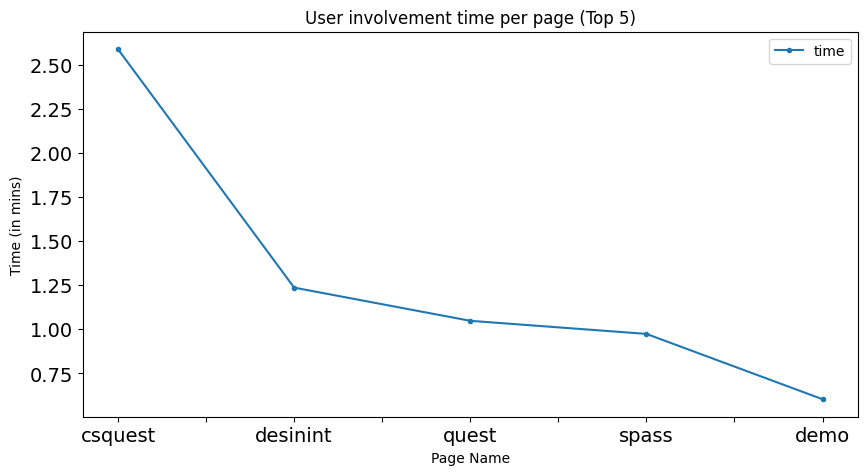

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [5]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [6]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_570/349911366.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  quest.update(normquest)


,0,1,2,3,4,5,6,7,8,9,10,11,mean,median
rewarding,6.0,2.0,5.0,4.0,6.0,2.0,6.0,6.0,5.0,6.0,7.0,4.0,4.916667,5.0
beneficial,7.0,2.0,6.0,6.0,6.0,3.0,6.0,7.0,4.0,6.0,7.0,6.0,5.500000,6.0
ordered,6.0,3.0,5.0,6.0,6.0,3.0,7.0,7.0,4.0,7.0,5.0,7.0,5.500000,6.0
organized,7.0,4.0,7.0,7.0,6.0,5.0,6.0,7.0,6.0,7.0,4.0,6.0,6.000000,6.0
structured,7.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,4.0,7.0,2.0,6.0,5.500000,6.0
well grouped,6.0,3.0,6.0,6.0,7.0,6.0,6.0,6.0,5.0,7.0,5.0,5.0,5.666667,6.0
helpful,7.0,3.0,6.0,7.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,5.0,6.250000,7.0
easy,6.0,3.0,6.0,7.0,6.0,4.0,7.0,6.0,4.0,7.0,1.0,5.0,5.166667,6.0
pleasant,7.0,3.0,4.0,7.0,7.0,6.0,6.0,7.0,7.0,5.0,7.0,5.0,5.916667,6.0
clear,7.0,2.0,6.0,7.0,6.0,3.0,7.0,6.0,2.0,7.0,6.0,5.0,5.333333,6.0


### CSQuest

In [7]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual.to_csv('qualitative/csquest_conversation.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,10,11
9-1,"[Social Media, Email, Financial Websites, Gami...",[None of the above],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Course Management Websites, e.g...","[Social Media, Email, E-commerce Websites, Gov...","[Social Media, Email]","[Social Media, Email, Financial Websites]","[Social Media, Financial Websites, E-commerce ...","[Financial Websites, Government Websites]","[Social Media, Email, Course Management Websit...","[Social Media, Financial Websites, Gaming Webs...","[Financial Websites, Government Websites, Cour..."
11-1,This is entertaining and relatable! It is an i...,I thought about if I would personally use this...,It is nice. Simple to read and understand. S...,I think that it is clean and concise and under...,good,easy,It is novel and creative way of learning how t...,I think it's a great idea and a nice design. ...,The design is eay to evaluate and give ideas t...,"I mean this is pretty great, if quite a bit to...",It's very creative and easy to understand with...,It's in a simple comic format that nothing rea...


In [8]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_570/3295141098.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  csquestquant.update(normquest)


,0,1,2,3,4,5,6,7,8,9,10,11,mean,median
Stimulates me to create a strong password,6.0,6.0,6.0,4.0,7.0,4.0,7.0,7.0,5.0,5.0,7.0,3.0,5.583333,6.000000
Makes me put trust on the presented password creation strategy,7.0,5.0,5.0,5.0,6.0,4.0,7.0,7.0,3.0,4.0,6.0,4.0,5.250000,5.000000
Encourages me to use the presented password creation strategy in real life,7.0,5.0,6.0,6.0,7.0,4.0,7.0,7.0,6.0,4.0,7.0,2.0,5.666667,6.000000
,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,3.0,7.0,7.0,6.0,6.000000,6.000000
Encourages me to create a strong password,7.0,6.0,7.0,4.0,6.0,5.0,7.0,6.0,3.0,6.0,7.0,4.0,5.666667,6.000000
Makes me feel capable of creating a strong password,7.0,4.0,7.0,6.0,7.0,4.0,7.0,7.0,3.0,7.0,7.0,5.0,5.916667,7.000000
Makes me feel confident that I can create a strong password,7.0,5.0,7.0,6.0,6.0,5.0,7.0,7.0,6.0,7.0,7.0,4.0,6.166667,6.166667
,4.0,3.0,4.0,7.0,7.0,4.0,7.0,7.0,3.0,5.0,7.0,6.0,5.333333,5.333333
,7.0,5.0,5.0,7.0,6.0,5.0,7.0,7.0,5.0,7.0,5.0,7.0,6.083333,6.083333
Novel,7.0,2.0,5.0,3.0,6.0,5.0,6.0,6.0,2.0,7.0,6.0,3.0,4.833333,5.000000


### First Password Survey

In [9]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,10,11,mean,median
"I do not change my passwords, unless I have to.",6,7,2,7,7,6,6,6,5,6,5,6,5.750000,6.0
I use different passwords for different online accounts that I have.,6,5,6,1,6,5,1,3,7,4,2,2,4.000000,4.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",7,6,6,1,7,4,2,6,3,6,7,3,4.833333,6.0
I do not include special characters in my password if it’s not required.,1,4,2,5,6,4,5,1,6,2,2,5,3.583333,4.0


### Second Password Survey

In [10]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())

qualindex = ['8-1']
spassqual = spass.loc[qualindex]
spassqual

,0,1,2,3,4,5,6,7,8,9,10,11
8-1,I used a variation of the strategy presented i...,I used a totally different strategy.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a totally different strategy.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used a totally different strategy.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.


In [11]:
spassquant = spass.drop(qualindex).fillna(0).astype(int)
spassquant.drop(attention.get('8'), inplace=True)

normqsid = []
normspassquant = 8 - spassquant.loc[normqsid]
spassquant.update(normquest)

new_index = {}
for qsid in spassquant.index:
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spassquant = spassquant.rename(new_index)
spassquant['mean'] = spassquant.mean(axis=1)
spassquant['median'] = spassquant.median(axis=1)

spassquant

,0,1,2,3,4,5,6,7,8,9,10,11,mean,median
,7,5,6,5,7,5,7,6,5,6,7,5,5.916667,6.000000
Hard to remember,3,1,2,2,6,5,1,5,6,1,1,5,3.166667,3.000000
Can be easily guessed by a hacker,2,1,2,2,7,5,1,2,4,2,1,2,2.583333,2.000000
Can be easily guessed by my close friends or family members,1,1,1,1,6,4,1,2,6,1,1,1,2.166667,1.000000
Stronger than the passwords I usually use,7,4,4,4,7,5,7,4,6,6,5,5,5.333333,5.000000
,2,2,2,2,2,2,2,2,2,2,2,2,2.000000,2.000000
,7,2,5,7,7,4,7,6,6,6,7,5,5.750000,6.000000
,1,3,1,2,7,4,1,2,3,1,5,5,2.916667,2.916667


### Demographics

In [12]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adoption security expert
0,Man,55-59 years old,[White],Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Freelance,Self-taught,Self-taught,7
1,Man,30-34 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5
2,Man,35-39 years old,[White],Four-year College Degree,Business,Business or industry,Self-taught,No experience,7
3,Woman,55-59 years old,[White],Graduate degree (MS/Doctorate),"Mathematics, and Natural Sciences (Physics, Ch...",Non-profit organization,Self-taught,No experience,7
4,Woman,18-24 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Business or industry,Self-taught,Self-taught,6
5,Woman,25-29 years old,[White],Four-year College Degree,"Journalism, Media and Communication",Business or industry,Formal training,Formal training,5
6,Woman,30-34 years old,[White],Four-year College Degree,I prefer not to answer,Business or industry,No experience,No experience,6
7,Woman,50-54 years old,[White],Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,Self-taught,6
8,Man,25-29 years old,[White],Four-year College Degree,"Architecture, Design, and Arts",Educational institution,Formal training,Formal training,6
9,Man,35-39 years old,[White],Graduate degree (MS/Doctorate),"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6


In [13]:
demo['gender'].value_counts()

Man      6
Woman    6
Name: gender, dtype: int64